# Holt Winters Exponential Smoothing

In order to understand what the Holt-Winters Exponential Smoothing method is for predicting a time series, we must first look at regular exponential smoothing.

## Exponential Smoothing

Exponential smoothing takes weighted averages of previous values to predict the next value. This method of weighted averages is nothing new, but exponential smoothing assumes that recent values in your time series are more important than previous values. In this fashion, the weighted averages exponentially decrease as you go further back in the series. The equation for exponential smoothing is as follows:

$$\hat{Y}_{t} = \alpha Y_{t-1} + (1 - \alpha) \hat{Y}_{t-1}$$

Such that $\hat{Y}$ is the predicted (or forecasted) value, $Y$ is the actual / measured value, and $\alpha$ is the smoothing constant between 0 and 1. A larger $\alpha$ means that more emphasis is placed on the most recent value. Notice that in order to predict the next value, we must have measured the previous value. This means that if you attempt to predict values, it will output the same exact forecast. In this fashion, we cannot predict trends or seasons with this simple exponential smoothing model.

## Holt Exponential Smoothing

In order to solve the issue of predicting trends, we take a look at Holt exponential smoothing, which is a very similar equation to regular exponential smoothing, with the addition that it keeps track of trend in the same fashion as exponential smoothing. The new equations are as follows:

$$L_{t} = \alpha Y_{t-1} + (1 - \alpha) (L_{t-1} + T_{t-1})$$
$$T_{t} = \beta (L_{t} - L_{t-1}) + (1 - \beta) T_{t-1}$$

Such that our exponential smoothing equation (top) is modified to use $L$ instead of $\hat{Y}$ for "level", and $T$ represents the linear trend. $\beta$ is another smoothing constant between 0 and 1, like $\alpha$. Notice now, that the trend is taken into account when doing the regular exponential smoothing calculation, along with calculating the next trend. This method is also sometimes called linear exponential smoothing.

## Holt Winters Exponential Smoothing

The last variation of exponential smoothing takes seasonality into account as well. This is especially useful for predicting annual temperature as there is a "seasonal" component to it (temperature follows a similar pattern every year). The are many different equations often used with holt winters exponential smoothing for either multiplicative or additive smoothing. The exact one depends on the nature of the model. To read more about this, visit https://timeseriesreasoning.com/contents/holt-winters-exponential-smoothing/, which has some excellent descriptions on these models.

#### Let's start by looking at some example data

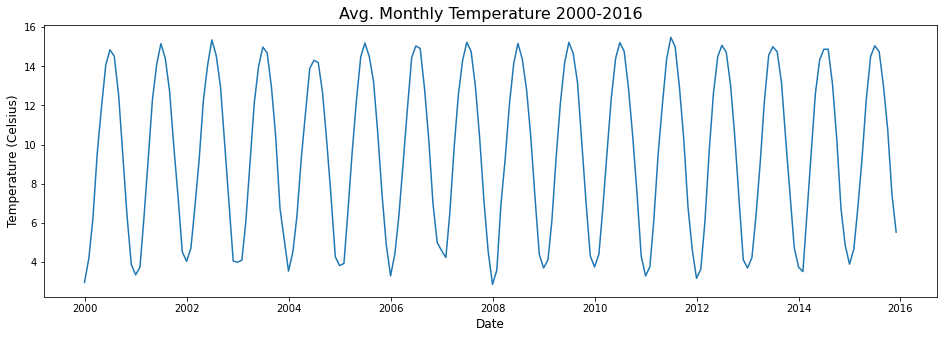

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("GlobalTemperatures.csv")
# Only look at recent values
df = df[df["dt"] >= '2000-01-01']
tempData = pd.Series(df["LandAverageTemperature"].tolist(), pd.date_range(start="2000-01-01", end="2015-12-01", freq="MS"))

fig, ax = plt.subplots(figsize=(16, 5))
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Temperature (Celsius)", size=12)
ax.set_title("Avg. Monthly Temperature 2000-2016", size=16)

plt.plot(tempData);

#### Now, let's apply holt-winters exponential smoothing to this data

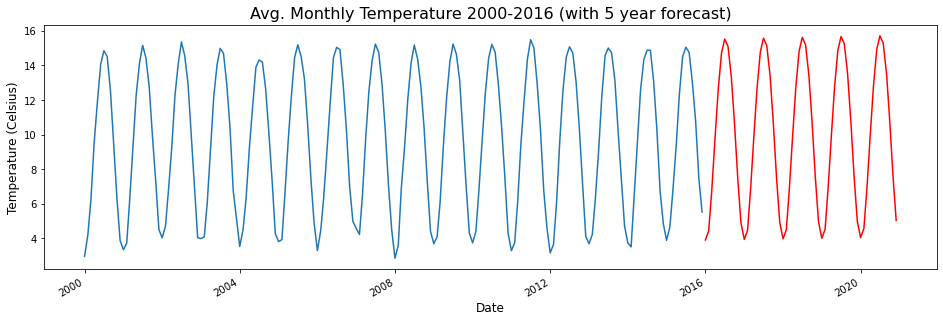

In [45]:
fit = ExponentialSmoothing(
    tempData,
    seasonal_periods=12,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()

fig, ax = plt.subplots(figsize=(16, 5))
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Temperature (Celsius)", size=12)
ax.set_title("Avg. Monthly Temperature 2000-2016 (with 5 year forecast)", size=16)

ax.plot(tempData)
fit.forecast(60).plot(ax=ax, color="red");

Our fit appears as if it estimated a gradual rise in temperature values over the next coming years. This is apparent if we look at the last calculated trend (slope):

In [56]:
fit.trend[-1]

0.002005697461233467

While small, this estimates a .00